# ABSENTEEISM

## This data set consists of 12 columns, the first 11 columns represent the features related with absenteeism, and the last column shows the duration of absence.

In this file, I will first understand the data and then make it ready to apply appropriate models to understand relationships.

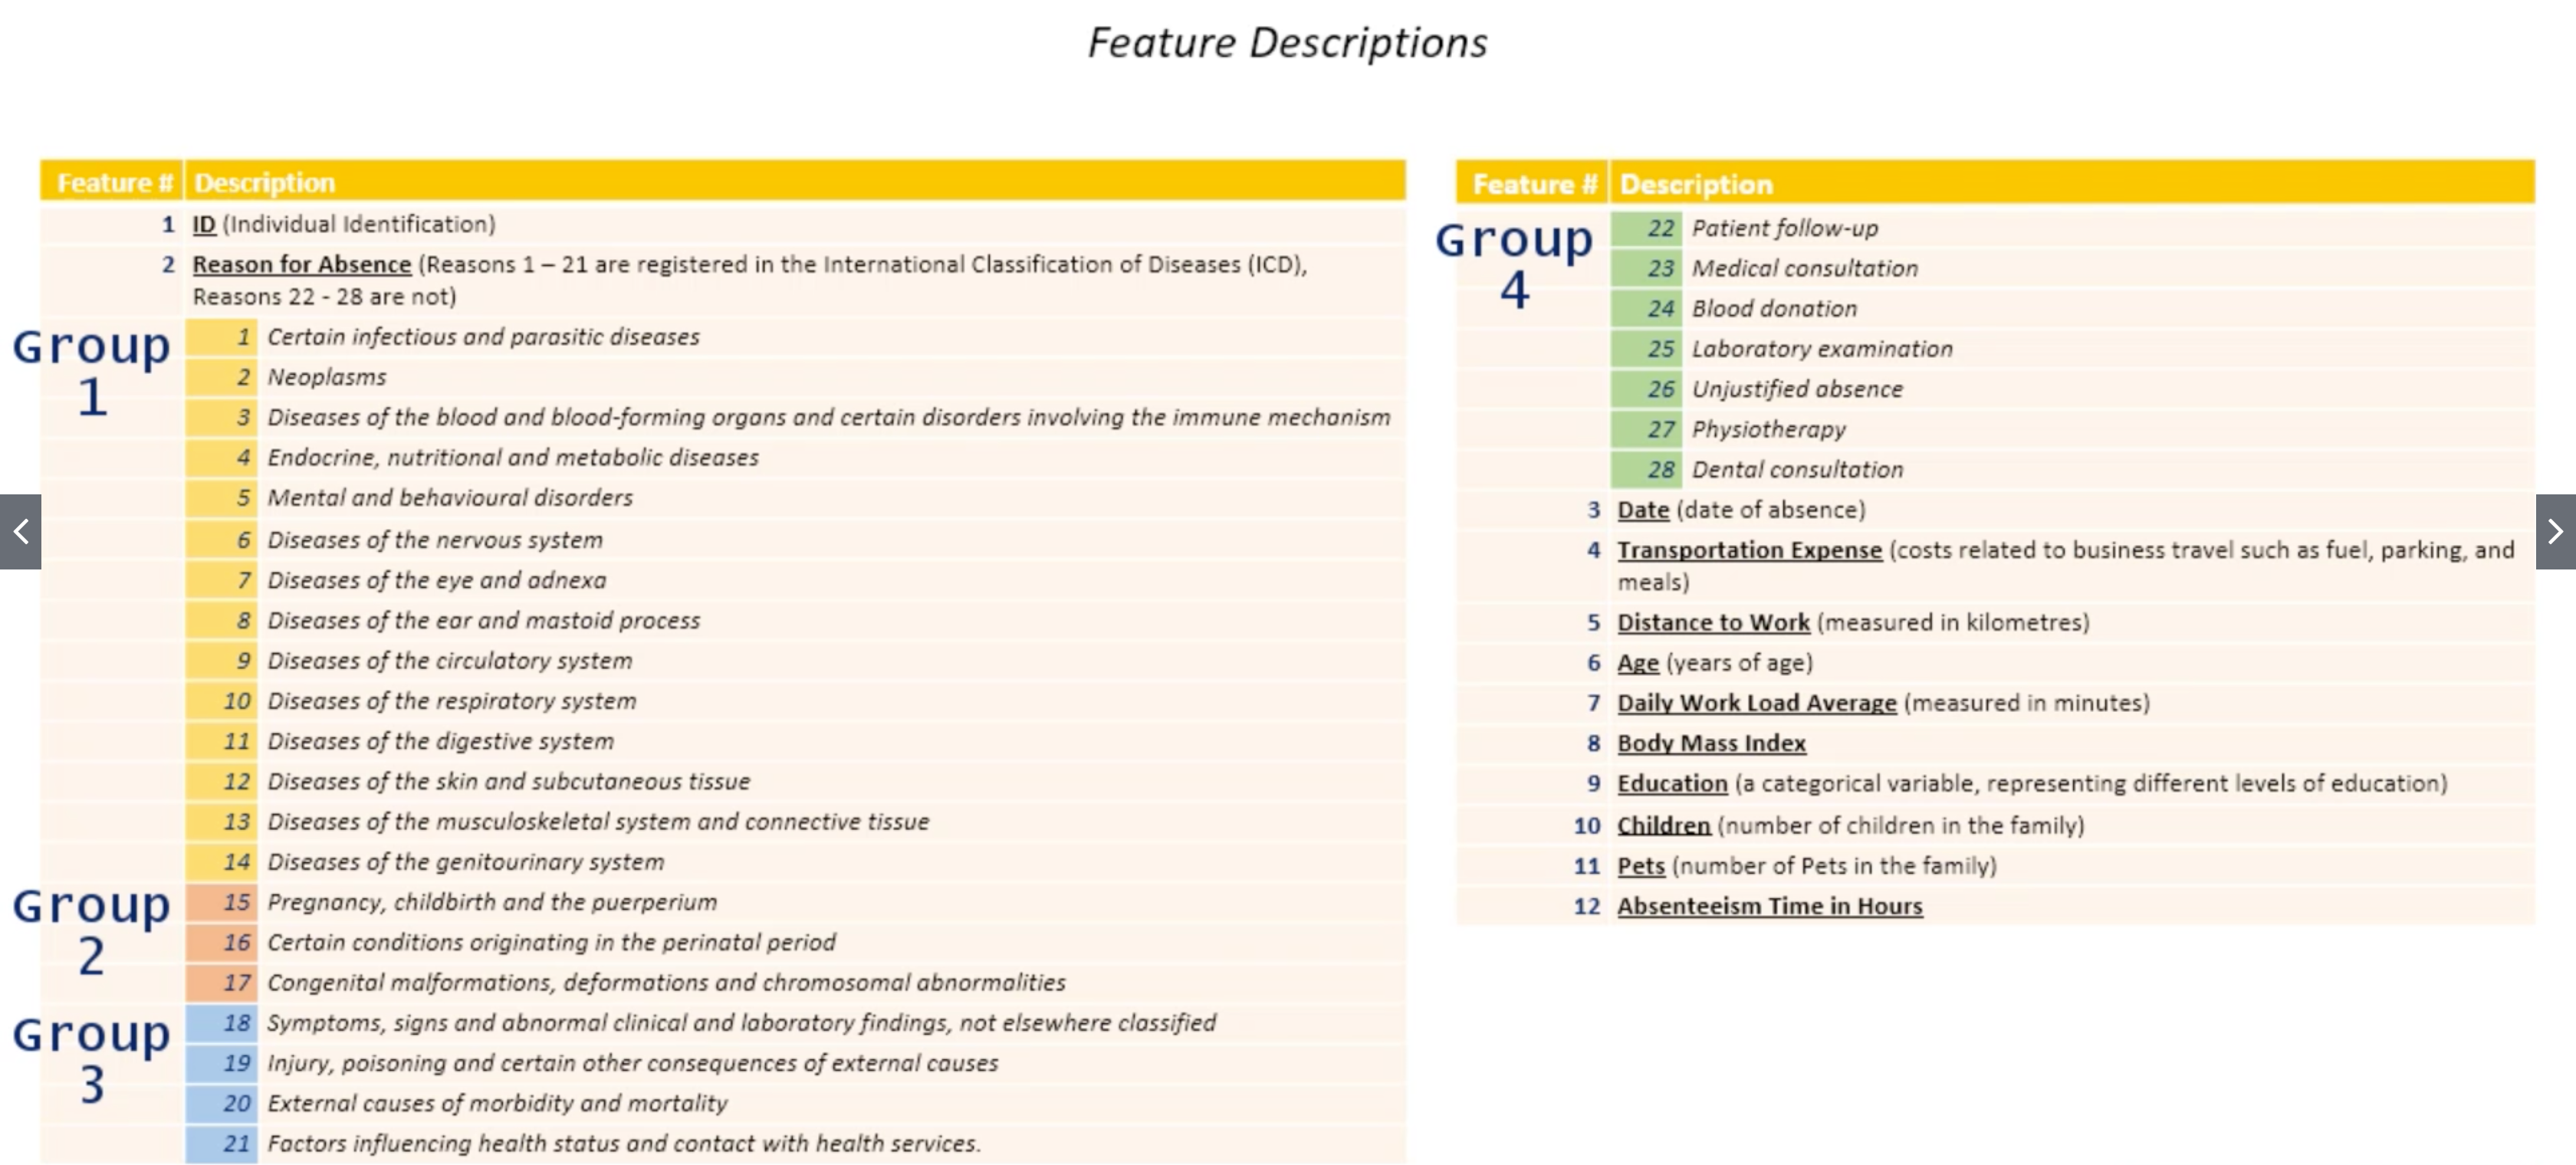

In [1]:
import pandas as pd 
import numpy as np

In [2]:
Data = pd.read_csv("Absenteeism_data.csv")
df = Data.copy()

In [3]:
df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [4]:
df.shape

(700, 12)

### Descriptive analytical steps;
- The data contains 11 independent variables and 1 dependent variable regarding absenteeism in a company between 2012/07 - 2018/05.

- In the above dataframe, the first 11 features from left to right are input, while the rightmost "Absenteeism Time in Hours" is output.

- Some feature explanations are as follows; 

-ID : The number given to identify individuals. 

-Date: Date of absence. 

-Transportation Expense: It expresses the costs of business travel (includes fuel, parking, meal expenses).

-Distance to Work: Measured in KM.

-Age: Age.

-Daily Work Load Average: Expressed in minutes.

-Education:Categorical variable expressing different education categories.

-Children: Number of children in the family

-Pets: Number of pets in the home

- We will be predicting the absenteeism (independent column "Absenteeism time in hours" on the far right) of an individual with certain characteristics.



In [5]:
#Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,700.0,17.951429,11.028144,1.000,9.000,18.000,28.000,36.000
Reason for Absence,700.0,19.411429,8.356292,0.000,13.000,23.000,27.000,28.000
Transportation Expense,700.0,222.347143,66.312960,118.000,179.000,225.000,260.000,388.000
Distance to Work,700.0,29.892857,14.804446,5.000,16.000,26.000,50.000,52.000
Age,700.0,36.417143,6.379083,27.000,31.000,37.000,40.000,58.000
Daily Work Load Average,700.0,271.801774,40.021804,205.917,241.476,264.249,294.217,378.884
Body Mass Index,700.0,26.737143,4.254701,19.000,24.000,25.000,31.000,38.000
Education,700.0,1.282857,0.668090,1.000,1.000,1.000,1.000,4.000
Children,700.0,1.021429,1.112215,0.000,0.000,1.000,2.000,4.000
Pets,700.0,0.687143,1.166095,0.000,0.000,0.000,1.000,8.000


In [6]:
#correlation of the features
df.corr()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
ID,1.000000,-0.079111,-0.203788,-0.493562,0.041367,0.092873,-0.320718,-0.032889,0.026095,0.005380,-0.005469
Reason for Absence,-0.079111,1.000000,-0.131790,0.160059,-0.055210,-0.130406,0.052741,-0.060083,-0.050053,-0.032872,-0.175826
Transportation Expense,-0.203788,-0.131790,1.000000,0.234940,-0.223828,0.006123,-0.140531,-0.054597,0.381749,0.446887,0.008342
Distance to Work,-0.493562,0.160059,0.234940,1.000000,-0.131076,-0.073683,0.136190,-0.282600,0.048534,0.171585,-0.080593
Age,0.041367,-0.055210,-0.223828,-0.131076,1.000000,-0.045452,0.483762,-0.209330,0.046930,-0.252067,0.035784
Daily Work Load Average,0.092873,-0.130406,0.006123,-0.073683,-0.045452,1.000000,-0.098430,-0.077012,0.032194,0.010490,0.029609
Body Mass Index,-0.320718,0.052741,-0.140531,0.136190,0.483762,-0.098430,1.000000,-0.348758,-0.155711,-0.066484,-0.040203
Education,-0.032889,-0.060083,-0.054597,-0.282600,-0.209330,-0.077012,-0.348758,1.000000,-0.179521,-0.080899,-0.035621
Children,0.026095,-0.050053,0.381749,0.048534,0.046930,0.032194,-0.155711,-0.179521,1.000000,0.116586,0.093661
Pets,0.005380,-0.032872,0.446887,0.171585,-0.252067,0.010490,-0.066484,-0.080899,0.116586,1.000000,-0.024522


In [7]:
#let's see the types etc. of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


It appears in the info detail that the Date column is in object type and the Dailiy Work Load Average column is in decimal format. But the main idea is whether they are in number format because their decimals can be ignored as their effect on absenteeism will be very small.

### Data processing
- The number contained in the ID column, which serves to distinguish each individual from each other, does not affect the absenteeism. Therefore, we will remove this column from the dataframe. But first, let's check if there is a NaN in the data.


In [8]:
df.isnull()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum().sum()

0

We saw that we had no missing data. Now we continue to process the data, I follow this step to remove the ID column;

In [10]:
df = df.drop(['ID'], axis = 1)
df

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


- The data consists of 700 rows, but each column has its own singularity, numerical or categorical status.

- Although it looks like numeric we will convert the Reason for Absence column which is actually categorical, into a shape with 1 and 0 by using the get_dummies function.


In [11]:
reason_columns = pd.get_dummies(df["Reason for Absence"])
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


We will delete zero (0) from the column of Reason for absence because when we look at df, we see that it has never been absent, that is, there is no reason of absence.

In [12]:
reason_columns = pd.get_dummies(df["Reason for Absence"], drop_first = True)
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
df.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'], dtype=object)

In [14]:
reason_columns.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28])

In [15]:
df = df.drop(["Reason for Absence"], axis = 1)
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [16]:
Reason_1 = reason_columns.loc[:, 1:14].max(axis = 1)
Reason_2 = reason_columns.loc[:, 15:17].max(axis = 1)
Reason_3 = reason_columns.loc[:, 18:21].max(axis = 1)
Reason_4 = reason_columns.loc[:,22:].max(axis = 1)


In [17]:
df = pd.concat([df, Reason_1, Reason_2, Reason_3, Reason_4], axis = 1)
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,23/05/2018,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,24/05/2018,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,0,0,0,1


In [18]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [19]:
columns_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']


In [20]:
df.columns = columns_names
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [21]:
column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [22]:
df = df[column_names_reordered]
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


Şimdi Date kolonunu standardize ederek olası string içeriklerini bertaraf ederek tek tipe çevireceğiz.

In [23]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Reason_1                   700 non-null    uint8         
 1   Reason_2                   700 non-null    uint8         
 2   Reason_3                   700 non-null    uint8         
 3   Reason_4                   700 non-null    uint8         
 4   Date                       700 non-null    datetime64[ns]
 5   Transportation Expense     700 non-null    int64         
 6   Distance to Work           700 non-null    int64         
 7   Age                        700 non-null    int64         
 8   Daily Work Load Average    700 non-null    float64       
 9   Body Mass Index            700 non-null    int64         
 10  Education                  700 non-null    int64         
 11  Children                   700 non-null    int64         
 12  Pets    

In [25]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2


In [26]:
df.shape

(700, 14)

Considering that months and days of the week should have an active role in absenteeism, let's create separate columns for the months and days of the week.

In [27]:
list_of_months = []
for i in range(df.shape[0]):
    list_of_months.append(df["Date"][i].month)

In [28]:
df["Month Value"] = list_of_months

In [29]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


In [30]:
df.shape

(700, 15)

In [31]:
def date_of_weekday(date_value):
    return date_value.weekday()

In [32]:
df["Day of the Week"] = df["Date"].apply(date_of_weekday)
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


Now I will delete the Date column, then move the last two columns to the 5th and 6th columns. 

In [33]:
df = df.drop(['Date'], axis = 1)

In [34]:
column_names_upd = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value', 'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']

In [35]:
df = df[column_names_upd]
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


In [37]:
#I have never changed the name of df until now. At this point, I think I will create a copy and lead back if necessary. 
df2 = df.copy
df

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,5,2,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,5,3,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,5,3,235,16,32,237.656,25,3,0,0,2


There is the following expression for Education column in Description; "Education: Categorical variable expressing different education categories.". We do not know the equivalents of the categories, but let's see the unique data by asking if we can make a meaning at least;  

In [38]:
df["Education"].unique()

array([1, 3, 2, 4])

In [39]:
df["Education"].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

Although it is seen that there are 4 categories here, it is seen that the 1st category dominates the others with 583 in the number of pieces. If it is necessary to group them with the assumption that the organization will not employ under the High School, it can be considered as High School - Associate Degree - Undergraduate - Master / Doctorate. In this case, if we want to convert to 1 and 0, we see that we need to reduce these 4 categories to 2. In the final analysis, I thought that if we say 0 to high school graduates and 1 to others, we would have made the most optimum research in this study, which examines the relationship between education and absenteeism. 

In [40]:
df['Education'] = df['Education'].map({1:0, 2:1, 3:1, 4:1})

In [41]:
df["Education"].unique()

array([0, 1])

In [42]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


At this point, the dataframe has become suitable for statistical analysis. I will try to obtain meaningful results by applying a number of different models. But before I select the model and apply it, I should save the final version of the data in the same index in csv format and use the original file while applying each different model. 

In [43]:
df.to_csv("/Users/n/Desktop/Bm/ITU/Project/Absenteeism_last.csv", index = False)